In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
def ncdump(nc_fid, verb=True):
    '''
    ncdump outputs dimensions, variables and their attribute information.
    The information is similar to that of NCAR's ncdump utility.
    ncdump requires a valid instance of Dataset.

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print "\t\ttype:", repr(nc_fid.variables[key].dtype)
            for ncattr in nc_fid.variables[key].ncattrs():
                print '\t\t%s:' % ncattr,\
                      repr(nc_fid.variables[key].getncattr(ncattr))
        except KeyError:
            print "\t\tWARNING: %s does not contain variable attributes" % key

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print "NetCDF Global Attributes:"
        for nc_attr in nc_attrs:
            print '\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if verb:
        print "NetCDF dimension information:"
        for dim in nc_dims:
            print "\tName:", dim 
            print "\t\tsize:", len(nc_fid.dimensions[dim])
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print "NetCDF variable information:"
        for var in nc_vars:
            if var not in nc_dims:
                print '\tName:', var
                print "\t\tdimensions:", nc_fid.variables[var].dimensions
                print "\t\tsize:", nc_fid.variables[var].size
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

In [3]:
absol_nc_f = 'data/absolute.nc'

In [4]:
absol_nc_f_id = Dataset(absol_nc_f, 'r')

In [5]:
ab_attrs, ab_dims, ab_vars = ncdump(absol_nc_f_id)

NetCDF Global Attributes:
NetCDF dimension information:
	Name: lat
		size: 36
		type: dtype('float32')
		units: u'degrees_north'
	Name: lon
		size: 72
		type: dtype('float32')
		units: u'degrees_east'
	Name: time
		size: 12
		type: dtype('int16')
		units: u'months'
NetCDF variable information:
	Name: tem
		dimensions: (u'time', u'lat', u'lon')
		size: 31104
		type: dtype('int16')
		long_name: u'CRU_Global_1961-1990_Mean_Monthly_Surface_Temperature_Climatology'
		units: u'celsius'
		scale_factor: 0.01
		valid_min: -9000
		missing_value: -9999


In [6]:
lats = absol_nc_f_id.variables['lat'][:]
lons = absol_nc_f_id.variables['lon'][:]
time = absol_nc_f_id.variables['time'][:]
temp = absol_nc_f_id.variables['tem'][:]

In [7]:
usual_mean = np.mean(temp)

In [8]:
all_nc_f = 'data/CRUTEM.4.6.0.0.anomalies.nc'
all_nc_f_id = Dataset(all_nc_f,'r')
all_attrs, all_dims, all_vars = ncdump(all_nc_f_id)

NetCDF Global Attributes:
	title: u'CRUTEM4 temperature anomalies'
	institution: u'Climatic Research Unit, University of East Anglia/Met Office Hadley Centre'
	history: u''
	source: u''
	comment: u''
	reference: u'Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, M. Salmon, and C. P. Morice (2012), Hemispheric and large-scale land-surface air temperature variations: An extensive revision and an update to 2010, J. Geophys. Res., 117, D05127, doi:10.1029/2011JD017139'
	version: u'CRUTEM.4.6.0.0'
	Conventions: u'CF-1.0'
NetCDF dimension information:
	Name: latitude
		size: 36
		type: dtype('float32')
		standard_name: u'latitude'
		long_name: u'latitude'
		point_spacing: u'even'
		units: u'degrees_north'
		axis: u'Y'
	Name: longitude
		size: 72
		type: dtype('float32')
		standard_name: u'longitude'
		long_name: u'longitude'
		point_spacing: u'even'
		units: u'degrees_east'
		axis: u'X'
	Name: time
		size: 2018
		type: dtype('float32')
		standard_name: u'time'
		long_name: u'time'
		uni

In [9]:
all_lats = all_nc_f_id.variables['latitude'][:]
all_lons = all_nc_f_id.variables['longitude'][:]
all_time = all_nc_f_id.variables['time'][:]
all_temp = all_nc_f_id.variables['temperature_anomaly'][:]

In [10]:
all_temp_abs = np.mean(all_temp, axis=(1,2)) + usual_mean

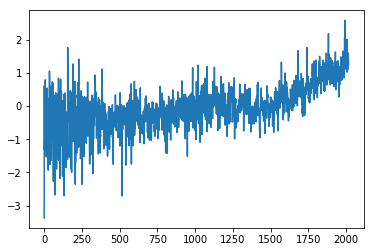

In [11]:
plt.plot(all_temp_abs-np.mean(all_temp_abs))

In [12]:
sunspot_f = 'data/bflydata.txt'
sunspot_f_raw = open(sunspot_f, "r").readlines()

In [27]:
# Carrington numbers
sunspot_indices = np.array(sunspot_f_raw[::6]).astype(int)
sunspot_indices = sunspot_indices*27.2753 + 312 + 3*365.25

In [14]:
sunspot_numbers = []
for i in range(len(sunspot_indices)):
    sunspot_number = np.concatenate((
                    np.array(sunspot_f_raw[i*6+1].split(','))[:-1].astype(int),
                    np.array(sunspot_f_raw[i*6+2].split(','))[:-1].astype(int),
                    np.array(sunspot_f_raw[i*6+3].split(','))[:-1].astype(int),
                    np.array(sunspot_f_raw[i*6+4].split(','))[:-1].astype(int),
                    np.array(sunspot_f_raw[i*6+5].split(','))[:-1].astype(int)))
    sunspot_numbers.append(sunspot_number)
    
sunspot_numbers = np.array(sunspot_numbers)

In [ ]:
interpolated_temperatures = np.interp(sunspot_indices, all_time, all_temp_abs)
assert(len(sunspot_indices)==len(sunspot_numbers))
sunspot_

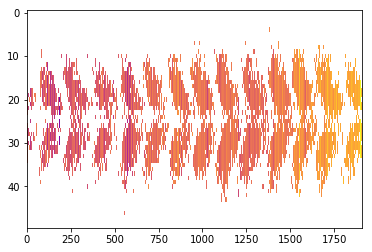

In [35]:
numbers_temp = np.copy(sunspot_numbers).astype(float)
for i in range(len(sunspot_indices)):
    for j in range(50):
        if sunspot_numbers_temp[i][j]!=0:
            sunspot_numbers_temp[i][j]=interpolated_temperatures[i]

plt.imshow(sunspot_numbers_temp.T, aspect='auto', cmap='plasma', norm=colors.LogNorm())